In [1]:
import torch
from torch.utils.data import DataLoader
from glob import glob
import os
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from components.mymodel import load_model
from components.dataset import SoilDataset
from components.helper import train

In [2]:
#We can check whether we have gpu
DEVICE = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
# DEVICE = 'cpu'
print("Device: ", DEVICE)

Device:  cuda:0


In [3]:
def get_model(model, image_set:str, epochs:int, lr:float):
    preprocess = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(256),
        # transforms.CenterCrop(224),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])


    dataset = SoilDataset('./dataset/OM_static_BG/', image_set, transform=preprocess)
    loader = DataLoader(dataset=dataset, batch_size=28, shuffle=True, num_workers=8)
    model, train_losses = train(model, loader, epochs, lr, DEVICE)
    plt.plot(train_losses)
    plt.title(image_set)
    plt.show()
    return model, train_losses

Found 20 images in ./dataset/OM_static_BG/black.
9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
179
189
199
209
219
229
239
249
259
269
279
289
299


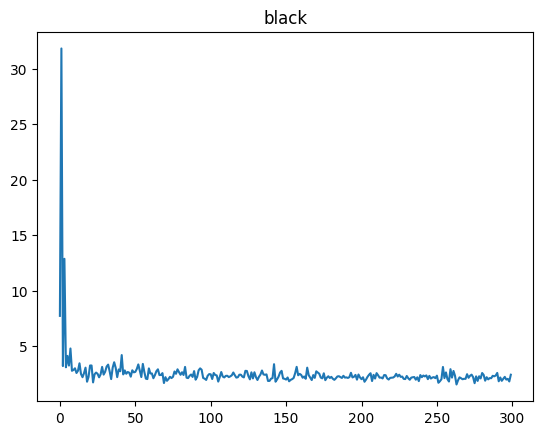

Found 20 images in ./dataset/OM_static_BG/white.
9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
179
189
199
209
219
229
239
249
259
269
279
289
299


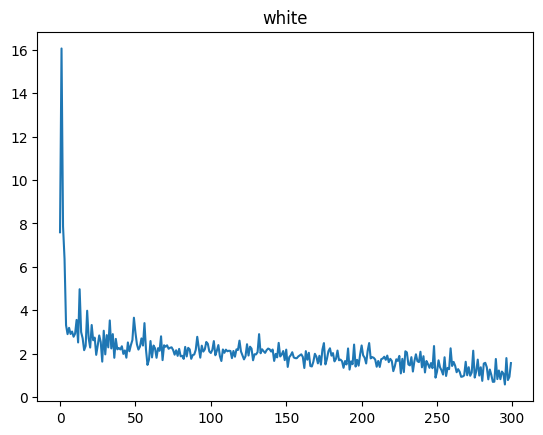

In [4]:
image_set_list = next(os.walk('./dataset/OM_static_BG/'))[1]
train_losses = []
# mobilenet_v3_large
# resnet50
# efficientnet_v2_l
model_name = 'efficientnet_v2_l'
weight_path = f'./weight/{model_name}'
epochs = 300
lr = 0.001

if(os.path.exists(weight_path) == False):
    os.makedirs(weight_path)
for image_set in image_set_list:
    model = load_model(model_name=model_name)
    model, train_loss = get_model(model, image_set, epochs, lr)
    train_losses.append(train_loss)
    torch.save(model.state_dict(), os.path.join(weight_path,f"{image_set}.pth"))